In [2]:
!apt-get install -y vizdoom
!pip install vizdoom gymnasium stable-baselines3 torch

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package vizdoom
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.1/28.1 MB 21.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 kB 16.4 MB/s eta 0:00:00


In [3]:
import vizdoom as vzd
import os
import numpy as np

game = vzd.DoomGame()

# Load scenario safely
game.load_config(os.path.join(vzd.scenarios_path, "basic.cfg"))

# IMPORTANT: Disable window rendering
game.set_window_visible(False)

game.init()

game.new_episode()

# Get number of buttons
num_buttons = game.get_available_buttons_size()

# Define a NO-OP action safely
noop = [2] * num_buttons

while not game.is_episode_finished():
    game.make_action(noop)

print("Episode finished")
print("Total reward:", game.get_total_reward())

game.close()


Episode finished
Total reward: 95.0


In [4]:
with open(os.path.join(vzd.scenarios_path, "basic.cfg")) as f:
    print(f.read())


# Lines starting with # are treated as comments (or with whitespaces+#).
# It doesn't matter if you use capital letters or not.
# It doesn't matter if you use underscore or camel notation for keys, e.g. episode_timeout is the same as episodeTimeout.

doom_scenario_path = basic.wad
doom_map = map01

# Rewards
living_reward = -1

# Rendering options
screen_resolution = RES_320X240
screen_format = CRCGCB
render_hud = true
render_crosshair = false
render_weapon = true
render_decals = false
render_particles = false
window_visible = true

# make episodes start after 20 tics (after unholstering the gun)
episode_start_time = 14

# make episodes finish after 300 actions (tics)
episode_timeout = 300

# Available buttons
available_buttons =
	{
		MOVE_LEFT
		MOVE_RIGHT
		ATTACK
	}

# Game variables that will be in the state
available_game_variables = { AMMO2 }

mode = PLAYER
doom_skill = 5



State is None? False


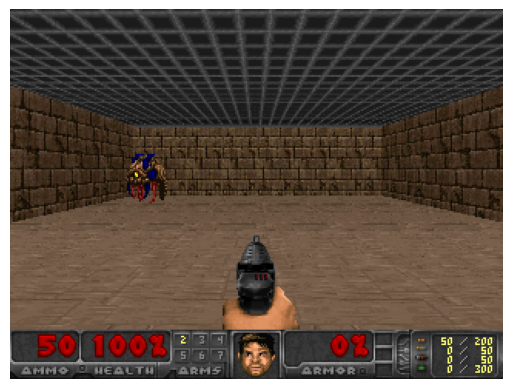

In [5]:
import vizdoom as vzd
import os
import numpy as np
import matplotlib.pyplot as plt

game = vzd.DoomGame()
game.load_config(os.path.join(vzd.scenarios_path, "basic.cfg"))
game.set_window_visible(False)
game.init()

# START THE EPISODE
game.new_episode()

# TAKE AT LEAST ONE ACTION
game.make_action([0, 0, 1])  # shoot once

# NOW the state exists
state = game.get_state()

print("State is None?", state is None)

frame = state.screen_buffer
frame = np.transpose(frame, (1, 2, 0))

plt.imshow(frame)
plt.axis("off")
plt.show()

game.close()


In [6]:
game = vzd.DoomGame()
game.load_config(os.path.join(vzd.scenarios_path, "basic.cfg"))
game.set_window_visible(False)
game.init()

shoot = [0, 0, 1]  # ATTACK

game.new_episode()

total = 0

while not game.is_episode_finished():
    r = game.make_action(shoot)
    total += r
    print("Step reward:", r)

print("Final total reward:", total)
game.close()

Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -6.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -6.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -6.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -6.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step reward: -1.0
Step rewar

In [ ]:
import random
game = vzd.DoomGame()
game.load_config(os.path.join(vzd.scenarios_path, "basic.cfg"))
game.set_window_visible(False)
game.init()

# ---------- Action space ----------
# Inspect buttons once
buttons = game.get_available_buttons()
num_buttons = game.get_available_buttons_size()

print("Available buttons:", buttons)
print("Number of buttons:", num_buttons)

# Create all single-action combinations + no-op
actions = []
actions.append([0] * num_buttons)  # no-op

for i in range(num_buttons):
    a = [0] * num_buttons
    a[i] = 1
    actions.append(a)

print("Action space:")
for a in actions:
    print(a)

# ---------- Random agent ----------
def run_random_agent(num_episodes=10):
    episode_rewards = []
    episode_lengths = []

    for ep in range(num_episodes):
        game.new_episode()
        total_reward = 0
        steps = 0

        while not game.is_episode_finished():
            action = random.choice(actions)
            reward = game.make_action(action)
            total_reward += reward
            steps += 1

        episode_rewards.append(total_reward)
        episode_lengths.append(steps)

        print(f"Episode {ep+1:02d} | Reward: {total_reward:7.1f} | Steps: {steps}")

    return episode_rewards, episode_lengths

# ---------- Run baseline ----------
rewards, lengths = run_random_agent(num_episodes=10)

print("\n===== RANDOM AGENT BASELINE =====")
print(f"Mean reward: {np.mean(rewards):.2f}")
print(f"Std reward : {np.std(rewards):.2f}")
print(f"Mean steps : {np.mean(lengths):.1f}")

game.close()

Available buttons: [<Button.MOVE_LEFT: 11>, <Button.MOVE_RIGHT: 10>, <Button.ATTACK: 0>]
Number of buttons: 3
Action space:
[0, 0, 0]
[1, 0, 0]
[0, 1, 0]
[0, 0, 1]
Episode 01 | Reward:    92.0 | Steps: 9
Episode 02 | Reward:  -375.0 | Steps: 300
Episode 03 | Reward:  -261.0 | Steps: 287
Episode 04 | Reward:  -375.0 | Steps: 300
Episode 05 | Reward:    90.0 | Steps: 11
Episode 06 | Reward:  -272.0 | Steps: 298
Episode 07 | Reward:  -370.0 | Steps: 300
Episode 08 | Reward:  -370.0 | Steps: 300
Episode 09 | Reward:  -175.0 | Steps: 221
Episode 10 | Reward:    49.0 | Steps: 42

===== RANDOM AGENT BASELINE =====
Mean reward: -196.70
Std reward : 189.69
Mean steps : 206.8
